In [7]:
import pandas as pd
import numpy as np

# Load Data
training_data = pd.read_csv(r"C:\Users\Kumar\Desktop\dat preprocessing\preprocessed_training_data.csv")
testing_data = pd.read_csv(r"C:\Users\Kumar\Desktop\dat preprocessing\preprocessed_testing_data.csv")

# Combine and Sort by Timestamp
data = pd.concat([training_data, testing_data]).sort_values(by='timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Normalize Glucose Levels
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['glucose_level'] = scaler.fit_transform(data[['glucose_level']])

# Create Input-Output Sequences for Training
sequence_length = 10  # Use 10 readings
forecast_horizon = 6  # Predict 6 steps ahead (30 minutes assuming 5-min intervals)

def create_sequences(data):
    """ Helper to generate sequences and corresponding outputs """
    X, y = [], []
    for i in range(len(data) - sequence_length - forecast_horizon):
        try:
            input_seq = data['glucose_level'].iloc[i:i+sequence_length].values
            target_value = data['glucose_level'].iloc[i+sequence_length+forecast_horizon]
            X.append(input_seq)
            y.append(target_value)
        except IndexError:
            continue
    return np.array(X), np.array(y)

# Split data into training and testing based on timestamp ranges
training_end = data.index[-len(testing_data)]  # End timestamp for training data
training_data_window = data.loc[:training_end]
testing_data_window = data.loc[training_end:]

# Generate sequences
X_train, y_train = create_sequences(training_data_window)
X_test, y_test = create_sequences(testing_data_window)

# Print Data Shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (10781, 10), y_train shape: (10781,)
X_test shape: (2498, 10), y_test shape: (2498,)


In [6]:
pip install scikit-learn


  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 1.4 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.1 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.1 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.1 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.1 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.1 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/11.1 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/11.1 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.1 MB 2.9 MB/s eta 0:00:04
   ----- -------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import tensorflow as tf

# Define LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),  # Input sequence with shape (10, 1)
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape X_train and X_test to fit LSTM input requirements (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the Model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate on Test Data
test_loss, test_mae = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss (MSE): {test_loss}, Test MAE: {test_mae}")


Epoch 1/20


c:\Users\Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0339 - mae: 0.1327 - val_loss: 0.0124 - val_mae: 0.0816
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0116 - mae: 0.0805 - val_loss: 0.0100 - val_mae: 0.0750
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - mae: 0.0743 - val_loss: 0.0092 - val_mae: 0.0697
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - mae: 0.0736 - val_loss: 0.0093 - val_mae: 0.0710
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0101 - mae: 0.0730 - val_loss: 0.0084 - val_mae: 0.0657
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mae: 0.0688 - val_loss: 0.0078 - val_mae: 0.0635
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mae: 0.0686 - val_loss: 0.0078 - val_mae: 0.0639
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mae: 0.0675 - val_loss: 0.0076 - val_mae: 0.0615
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0089 

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.48488513]
 [0.4794337 ]
 [0.4964461 ]
 ...
 [0.4042187 ]
 [0.4083172 ]
 [0.41175684]]


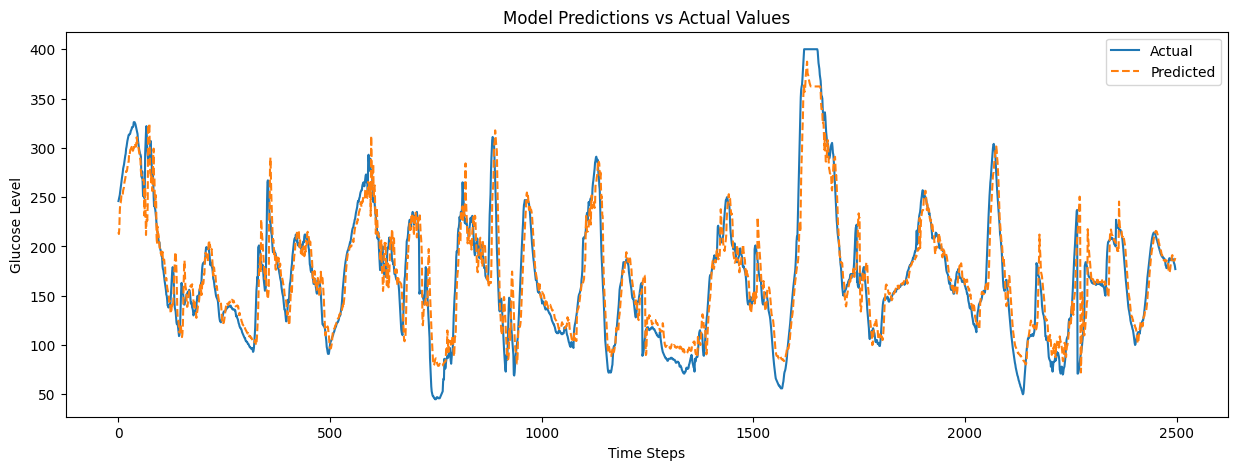

In [17]:
import matplotlib.pyplot as plt

# Make predictions on test data
predictions = model.predict(X_test_reshaped)
print(predictions)
# Rescale predictions and actual values to original scale
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_rescaled = scaler.inverse_transform(predictions)

# Plot actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Glucose Level")
plt.title("Model Predictions vs Actual Values")
plt.show()


In [19]:
model.save('glucose_prediction_model.keras')


In [20]:
from tensorflow.keras.models import load_model

# Load the model using the `.keras` format
model = load_model('glucose_prediction_model.keras')


c:\Users\Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     --------- ----------------------------- 41.0/168.5 kB 1.9 MB/s eta 0:00:01
     --------- ----------------------------- 41.0/168.5 kB 1.9 MB/s eta 0:00:01
     -------------------- ---------------- 92.2/168.5 kB 871.5 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/168.5 kB 819.2 kB/s eta 0:00:01
     -------------------------- --------- 122.9/168.5 kB 654.9 kB/s eta 0:00:01
     ------------------------------ ----- 143.4/168.5 kB 607.9 kB/s eta 0:00:01
     ------------------------------------ 168.5/168.5 kB 563.2 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
